In [376]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [411]:
data_us_counties=pd.read_csv("us-counties.csv")
df=data_us_counties.copy()
display(df)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
586297,2020-09-30,Sweetwater,Wyoming,56037.0,339,2
586298,2020-09-30,Teton,Wyoming,56039.0,577,1
586299,2020-09-30,Uinta,Wyoming,56041.0,357,2
586300,2020-09-30,Washakie,Wyoming,56043.0,115,6


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586302 entries, 0 to 586301
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    586302 non-null  object 
 1   county  586302 non-null  object 
 2   state   586302 non-null  object 
 3   fips    580658 non-null  float64
 4   cases   586302 non-null  int64  
 5   deaths  586302 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 26.8+ MB


### 'date' datasında missing value kontrolü

In [378]:
df.isnull().sum()

date         0
county       0
state        0
fips      5644
cases        0
deaths       0
dtype: int64

FIPS: a standard geographic identifier code

In [379]:
c=df.drop(columns=['fips'])
c

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0
1,2020-01-22,Snohomish,Washington,1,0
2,2020-01-23,Snohomish,Washington,1,0
3,2020-01-24,Cook,Illinois,1,0
4,2020-01-24,Snohomish,Washington,1,0
...,...,...,...,...,...
586297,2020-09-30,Sweetwater,Wyoming,339,2
586298,2020-09-30,Teton,Wyoming,577,1
586299,2020-09-30,Uinta,Wyoming,357,2
586300,2020-09-30,Washakie,Wyoming,115,6


### 28 Haziran 2020 tarihi için eyaletlere göre filtreleme

#### Eyaletlere göre ortalama değerler:

In [428]:
c.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

In [381]:
c.query("date=='2020-06-28'").groupby(c.state).mean()

,cases,deaths
state,,
Alabama,528.970149,13.716418
Alaska,40.769231,0.461538
Arizona,4930.733333,106.266667
Arkansas,264.240000,3.520000
California,3806.228070,104.157895
Colorado,529.344262,27.475410
Connecticut,5144.777778,479.555556
Delaware,2806.500000,126.750000
District of Columbia,10248.000000,550.000000


#### Eyaletlere göre toplam değerler:

In [382]:
c.query("date=='2020-06-28'").groupby(c.state).sum()

,cases,deaths
state,,
Alabama,35441,919
Alaska,1060,12
Arizona,73961,1594
Arkansas,19818,264
California,216955,5937
Colorado,32290,1676
Connecticut,46303,4316
Delaware,11226,507
District of Columbia,10248,550


### death_rate kolonu oluşturma

In [383]:
c.query("cases==0")

,date,county,state,cases,deaths
9521,2020-03-24,Unknown,Arizona,0,3
10678,2020-03-24,Unknown,Texas,0,1
10748,2020-03-24,Unknown,Virginia,0,1
10891,2020-03-25,Unknown,Arizona,0,3
11221,2020-03-25,Unknown,Illinois,0,2
...,...,...,...,...,...
581043,2020-09-29,Unknown,Maryland,0,14
583028,2020-09-29,Unknown,Wisconsin,0,10
584053,2020-09-30,Unknown,Kansas,0,16
584284,2020-09-30,Unknown,Maryland,0,10


In [384]:
c["death_rate"]= (c.deaths / c.cases)*100
display(c)

,date,county,state,cases,deaths,death_rate
0,2020-01-21,Snohomish,Washington,1,0,0.000000
1,2020-01-22,Snohomish,Washington,1,0,0.000000
2,2020-01-23,Snohomish,Washington,1,0,0.000000
3,2020-01-24,Cook,Illinois,1,0,0.000000
4,2020-01-24,Snohomish,Washington,1,0,0.000000
...,...,...,...,...,...,...
586297,2020-09-30,Sweetwater,Wyoming,339,2,0.589971
586298,2020-09-30,Teton,Wyoming,577,1,0.173310
586299,2020-09-30,Uinta,Wyoming,357,2,0.560224
586300,2020-09-30,Washakie,Wyoming,115,6,5.217391


In [385]:
c.query("cases==0")

,date,county,state,cases,deaths,death_rate
9521,2020-03-24,Unknown,Arizona,0,3,inf
10678,2020-03-24,Unknown,Texas,0,1,inf
10748,2020-03-24,Unknown,Virginia,0,1,inf
10891,2020-03-25,Unknown,Arizona,0,3,inf
11221,2020-03-25,Unknown,Illinois,0,2,inf
...,...,...,...,...,...,...
581043,2020-09-29,Unknown,Maryland,0,14,inf
583028,2020-09-29,Unknown,Wisconsin,0,10,inf
584053,2020-09-30,Unknown,Kansas,0,16,inf
584284,2020-09-30,Unknown,Maryland,0,10,inf


In [430]:
c.death_rate=c.death_rate.replace(np.inf,0)
c.query("cases==0")

,date,county,state,cases,deaths,death_rate
9521,2020-03-24,Unknown,Arizona,0,3,0.0
10678,2020-03-24,Unknown,Texas,0,1,0.0
10748,2020-03-24,Unknown,Virginia,0,1,0.0
10891,2020-03-25,Unknown,Arizona,0,3,0.0
11221,2020-03-25,Unknown,Illinois,0,2,0.0
...,...,...,...,...,...,...
581043,2020-09-29,Unknown,Maryland,0,14,0.0
583028,2020-09-29,Unknown,Wisconsin,0,10,0.0
584053,2020-09-30,Unknown,Kansas,0,16,0.0
584284,2020-09-30,Unknown,Maryland,0,10,0.0


In [431]:
display(c)

,date,county,state,cases,deaths,death_rate
0,2020-01-21,Snohomish,Washington,1,0,0.000000
1,2020-01-22,Snohomish,Washington,1,0,0.000000
2,2020-01-23,Snohomish,Washington,1,0,0.000000
3,2020-01-24,Cook,Illinois,1,0,0.000000
4,2020-01-24,Snohomish,Washington,1,0,0.000000
...,...,...,...,...,...,...
586297,2020-09-30,Sweetwater,Wyoming,339,2,0.589971
586298,2020-09-30,Teton,Wyoming,577,1,0.173310
586299,2020-09-30,Uinta,Wyoming,357,2,0.560224
586300,2020-09-30,Washakie,Wyoming,115,6,5.217391


### Bar Chart

In [388]:
c_bar=c.groupby(['state']).death_rate.mean()
c_bar

state
Alabama                      2.336423
Alaska                       0.331165
Arizona                      3.020603
Arkansas                     1.661000
California                   1.990790
Colorado                     2.997946
Connecticut                  6.631188
Delaware                     2.769613
District of Columbia         4.134727
Florida                      2.598212
Georgia                      3.448255
Guam                         0.707413
Hawaii                       1.275191
Idaho                        1.236528
Illinois                     2.699168
Indiana                      4.561220
Iowa                         1.957184
Kansas                       1.605165
Kentucky                     2.506693
Louisiana                    5.179867
Maine                        2.983446
Maryland                    11.754319
Massachusetts                5.976133
Michigan                     4.927104
Minnesota                    2.242226
Mississippi                  3.699621
Missou

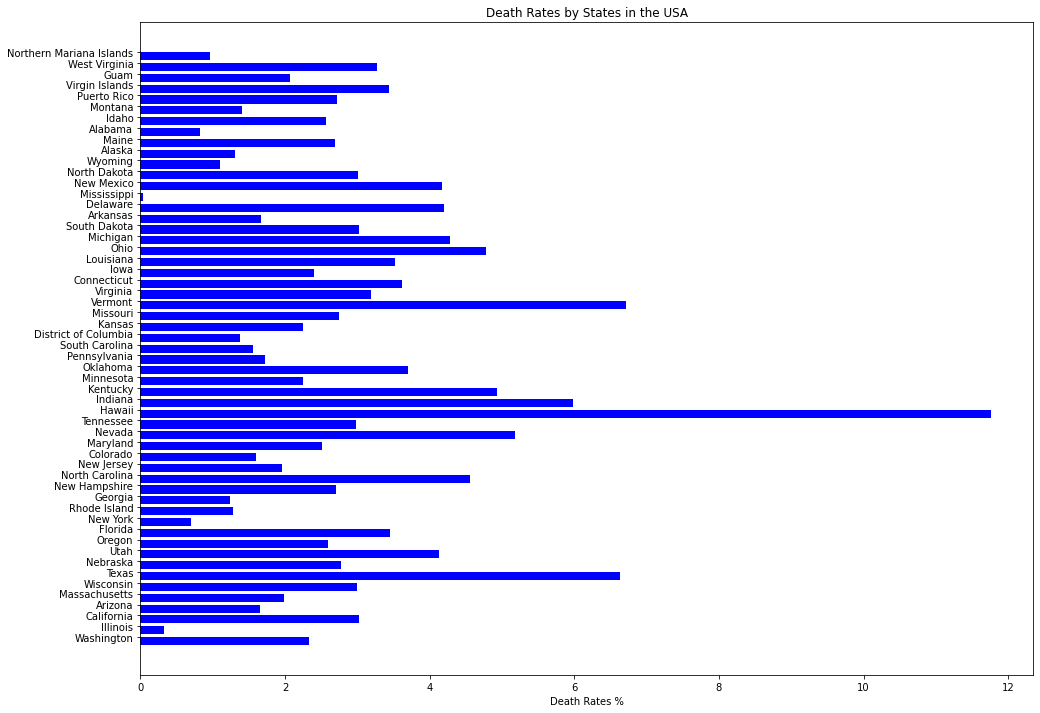

In [424]:
s=list(c.state.unique())
x_state=np.arange(len(s))
y_death=list(c_bar)
plt.figure(figsize=(16,12))

plt.barh(ind, y_death, width, color="blue")
plt.yticks(ind+width/2, labels=x)
plt.xlabel('Death Rates %')
plt.title('Death Rates by States in the USA')
plt.show()


Eyalet bazlı ölüm oranlarına bakıldığında en yüksek ölüm oranlarının Hawaii, Vermont ve Texas'da olduğunu görülmektedir. Daha ayrıntılı sonuçlara bakmak için oranın yüksek olduğu eyaletlere bağlı ilçeler incelenip diğerlerine göre daha yüksek olan ölüm oranları olan ilçeler tespit edilebilir. İlçelerin daha özelinde bakmak istersek analize FIPS kodlarını analize dahil edip daha küçük ölçekli bölgelerdeki ölüm oranları tespit edilebilir. 

Yüksek ölüm oranlarına sahip olabildiğince küçük ölçekte belirlenmiş bölgelerde bazı önlemler ve kısıtlamalar alınması gerekebilir. Ölüm oranların yüksek olması ile ilgili sebepler hakkında araştırmalar yapılabilir. Bölgesel olarak geleneklerden veya sosyal etkinliklerden kaynaklı kalabalık ortamların oluşmalarını engellemek için çalışmalar önerilebilir. İnsan hareketliliği incelenerek hangi tarih aralıklarının ilerideki dönemde ölüm oranlarının artmasına sebep olabileceği ile ilgili çalışmalar yapılabilir. Toplu taşıma verilerine erişilebiliyorsa, toplu taşımanın yoğun kullanıldığı bölgelerdeki ölüm oranları tespit edilip bu bölgelere toplu taşıma ulaşımlarının sıklığı artırılabilir.Ölüm oranlarının yüksek olduğu bölgelerdeki sağlık çalışanları sayısında artış sağlanması durumu değerlendirilebilir.

Ayrıca ölüm oranlarının sadece belirli aralıklarda(aylık, haftalık vb.) eyaletlere ve ilçelere göre ölüm oranları incelenebilir. Böylece ilk tarihlerde ortaya çıkan yüksek sayıdaki ölümlerden kaynaklı outlier değerler ile ilgili ortaya çıkabilecek problemlerin engellenmesi sağlanabilir.

### Histogram

Text(0.5, 0, 'Death Rates %')

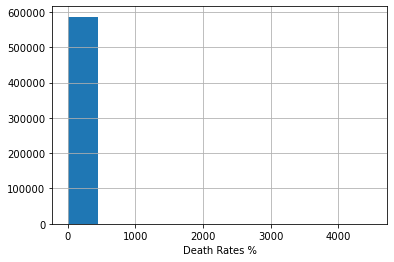

In [427]:
h.hist(bins=10)
plt.xlabel("Death Rates %")

Histogram grafiğine bakıldığında ölüm oran yüzdesinin 0'a yakın değerlerde yığıldığı gözükmektedir. 'death_race' değişkenindeki değer aralığı genişliğine bakarak outlier olabilecek değerler olduğunu görebiliriz. Histogramdan sonra yapılacak analizlerde outlier değerlerin tahmin ve değerlendirmeler anlamındaki önemi incelenebilir. Ölüm oranı metriğinin öneminden dolayı outlier değerleri veri içerisinde tutmaya devam etmek istenebilir. Sonrasında yapılacak tahminleme çalışmalarında outlier değerlerimizin modeli etkileyip sonuçlarda çarpıklık yaratabilmesi sebebiyle, gürültülü verileri modelde eğitmeden önce bu verileri yumuşatma (binning, smoothing) işlemi veya normalizasyon işlemleri uygulanabilir. Outlier değerlerin tarih bazında incelenmesi yapılabilir. 
Şuan ki durumdaki histograma  bakarak, büyük çoğunlukta ölüm oranlarının vaka sayılarına göre düşük olduğu varsayılabilir. Ancak bu süreçte sadece ölüm oranı sonuçlarına bakmak veriyi yanlış yorumlamamıza sebep olabilir. Hastalık öncesindeki ölüm oranları ile hastalık sonrasında oluşan ölüm oranları arasında artışın gözlemlenmesi durumun ciddiyeti ile ilgili daha anlamlı sonuçlara ulaşımasını sağlayabilir.

In [401]:
h=c.death_rate
h.describe()

count    586302.000000
mean          2.798905
std          12.972018
min           0.000000
25%           0.000000
50%           1.183432
75%           3.508772
max        4500.000000
Name: death_rate, dtype: float64

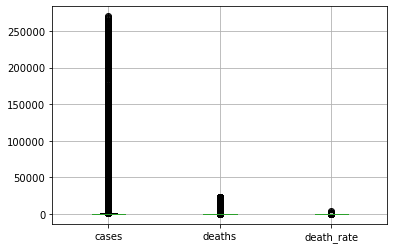

In [402]:
c.boxplot()
plt.show()